In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path

In [ ]:
# Load drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Make Participant List
participants = []
for i in range(1,18):
  if i != 1 and i!=12:
    participants.append("S"+ str(i))

print(participants)

participants_id = [x[1:] for x in participants]
print(participants_id)

['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17']
['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '13', '14', '15', '16', '17']


In [ ]:
def getParticipantData(participant):
  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/'.format(participant)
  path2 = path + "S{}/".format(participant)

  data = {}

  data['ACC'] = pd.read_csv(path2 + 'ACC.csv')
  data['ACC_x'] = pd.read_csv(path2 + 'ACC_x.csv')
  data['ACC_y'] = pd.read_csv(path2 + 'ACC_y.csv')
  data['ACC_z'] = pd.read_csv(path2 + 'ACC_z.csv')
  data['BVP'] = pd.read_csv(path2 + 'BVP.csv')
  data['EDA'] = pd.read_csv(path2 + 'EDA.csv')
  data['TEMP'] = pd.read_csv(path2 + 'TEMP.csv')

  return data

In [ ]:
# reading synchronized data from pickle file
def getSyncData(participant):
  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/'.format(participant)
  df = pd.read_pickle(path + "S" + str(participant) + '.pkl')

  return df

#print(getSyncData(2)['signal']['wrist'])
print(type(getSyncData(2)['signal']['wrist']['ACC']))
ACC_array = getSyncData(2)['signal']['wrist']['ACC']

<class 'numpy.ndarray'>


In [ ]:
print(ACC_array)
print("Shape: " + str(ACC_array.shape))
print("Type: "  + str(type(ACC_array)))

[[ 62. -21. 107.]
 [ 66.  13.  53.]
 [ 41.   9.  15.]
 ...
 [ 41.  25.  11.]
 [ 39.  27.  22.]
 [ 56.  26.  10.]]
Shape: (194528, 3)
Type: <class 'numpy.ndarray'>


In [ ]:
type(getParticipantData(2))
print(getParticipantData(2)['ACC'])
print("Type: " + str(type(getParticipantData(2)['ACC'])))

        1495437325.000000   1495437325.000000   1495437325.000000.1
0                    32.0                32.0                  32.0
1                    29.0                -6.0                  55.0
2                    28.0                -6.0                  55.0
3                    28.0                -6.0                  55.0
4                    28.0                -6.0                  55.0
...                   ...                 ...                   ...
251966               61.0               -14.0                   3.0
251967               61.0               -14.0                   3.0
251968               60.0               -14.0                   4.0
251969               63.0               -14.0                   5.0
251970               63.0               -14.0                   5.0

[251971 rows x 3 columns]
Type: <class 'pandas.core.frame.DataFrame'>


In [ ]:
BVP_arr = getSyncData(2)['signal']['wrist']['BVP']

In [ ]:
print(BVP_arr)
print("Shape: " + str(BVP_arr.shape))

[[-59.37]
 [-53.42]
 [-44.4 ]
 ...
 [ 18.26]
 [ 18.68]
 [ 19.71]]
Shape: (389056, 1)


In [ ]:
BVP_df = getParticipantData(2)['BVP']

In [ ]:
print(BVP_df)
print("Shape: " + str(BVP_df.shape))

        1495437325.00
0               64.00
1               -0.00
2               -0.00
3               -0.00
4               -0.00
...               ...
503939          96.51
503940          92.92
503941          85.61
503942          75.98
503943          65.86

[503944 rows x 1 columns]
Shape: (503944, 1)


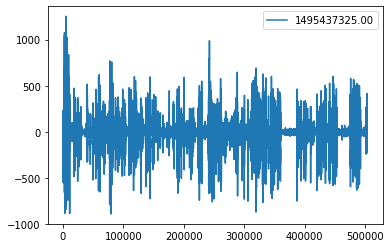

In [ ]:
BVP_df.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503944 entries, 0 to 503943
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   1495437325.00  503944 non-null  float64
dtypes: float64(1)
memory usage: 3.8 MB


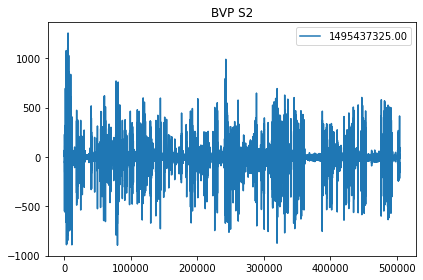

In [ ]:
BVP_df.info()
BVP_df.plot(title="BVP S2")
plt.tight_layout(); plt.show()

In [ ]:
ACC_df = getParticipantData(2)['ACC']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251971 entries, 0 to 251970
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   1495437325.000000     251971 non-null  float64
 1    1495437325.000000    251971 non-null  float64
 2    1495437325.000000.1  251971 non-null  float64
dtypes: float64(3)
memory usage: 5.8 MB


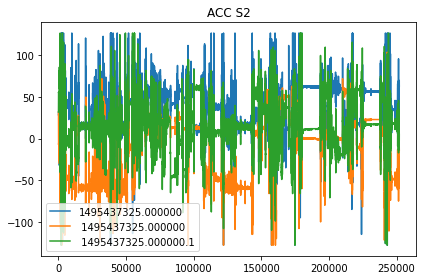

In [ ]:
ACC_df.info()
ACC_df.plot(title="ACC S2")
plt.tight_layout(); plt.show()

In [ ]:
display(BVP_df)

,1495437325.00
0,64.00
1,-0.00
2,-0.00
3,-0.00
4,-0.00
...,...
503939,96.51
503940,92.92
503941,85.61
503942,75.98


In [ ]:
# Add header to ACC file
file = ACC_df
print("original file:")
print(file)

# adding header
header_list = ['x', 'y', 'z']

# converting data frame to csv
file.to_csv("ACC2.csv", header = header_list, index=False)

# display modified csv file
file2 = pd.read_csv("ACC2.csv")
print("\nModified file:")
print(file2)



original file:
        1495437325.000000   1495437325.000000   1495437325.000000.1
0                    32.0                32.0                  32.0
1                    29.0                -6.0                  55.0
2                    28.0                -6.0                  55.0
3                    28.0                -6.0                  55.0
4                    28.0                -6.0                  55.0
...                   ...                 ...                   ...
251966               61.0               -14.0                   3.0
251967               61.0               -14.0                   3.0
251968               60.0               -14.0                   4.0
251969               63.0               -14.0                   5.0
251970               63.0               -14.0                   5.0

[251971 rows x 3 columns]

Modified file:
           x     y     z
0       32.0  32.0  32.0
1       29.0  -6.0  55.0
2       28.0  -6.0  55.0
3       28.0  -6.0  55.0
4

In [ ]:
acc_x = file2['x']
print(acc_x)

0         32.0
1         29.0
2         28.0
3         28.0
4         28.0
          ... 
251966    61.0
251967    61.0
251968    60.0
251969    63.0
251970    63.0
Name: x, Length: 251971, dtype: float64


In [ ]:
display(ACC_df)
headers = list(ACC_df.columns.values)
print(headers)

,1495437325.000000,1495437325.000000,1495437325.000000.1
0,32.0,32.0,32.0
1,29.0,-6.0,55.0
2,28.0,-6.0,55.0
3,28.0,-6.0,55.0
4,28.0,-6.0,55.0
...,...,...,...
251966,61.0,-14.0,3.0
251967,61.0,-14.0,3.0
251968,60.0,-14.0,4.0
251969,63.0,-14.0,5.0


['1495437325.000000', ' 1495437325.000000', ' 1495437325.000000.1']


In [ ]:
def seperateACC(participant):
  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/S{}/'.format(participant, participant)

  data = pd.read_csv(path + 'ACC.csv')
  # keep old headers (this is UNIX time stamp not to be omitted)
  old_headers = list(data.columns.values)

  # change header for easy access
  header_list = ['x', 'y', 'z']

  # converting data frame to csv
  data.to_csv("ACC_header.csv", header = header_list, index=False)

  # read new csv
  data_header = pd.read_csv("ACC_header.csv")

  # split into x,y,z
  df_x = data_header['x'].to_frame()
  df_y = data_header['y'].to_frame()
  df_z = data_header['z'].to_frame()
  
  # save files
  df_x.to_csv(os.path.join(path,"ACC_x.csv"), index = False, header = [old_headers[0]])
  df_y.to_csv(os.path.join(path,"ACC_y.csv"), index = False, header = [old_headers[1]])
  df_z.to_csv(os.path.join(path,"ACC_z.csv"), index = False, header = [old_headers[2]])

In [ ]:
# Seperate all ACC files for all participants

for participant in participants_id:
  seperateACC(participant)

['1495437325.000000', ' 1495437325.000000', ' 1495437325.000000.1']
['1495624128.000000', ' 1495624128.000000', ' 1495624128.000000.1']
['1497342820.000000', ' 1497342820.000000', ' 1497342820.000000.1']
['1497356533.000000', ' 1497356533.000000', ' 1497356533.000000.1']
['1497439238.000000', ' 1497439238.000000', ' 1497439238.000000.1']
['1499339464.000000', ' 1499339464.000000', ' 1499339464.000000.1']
['1499685040.000000', ' 1499685040.000000', ' 1499685040.000000.1']
['1499771441.000000', ' 1499771441.000000', ' 1499771441.000000.1']
['1500966308.000000', ' 1500966308.000000', ' 1500966308.000000.1']
['1500981259.000000', ' 1500981259.000000', ' 1500981259.000000.1']
['1502190787.000000', ' 1502190787.000000', ' 1502190787.000000.1']
['1502262571.000000', ' 1502262571.000000', ' 1502262571.000000.1']
['1502349056.000000', ' 1502349056.000000', ' 1502349056.000000.1']
['1502366365.000000', ' 1502366365.000000', ' 1502366365.000000.1']
['1502435962.000000', ' 1502435962.000000', ' 15

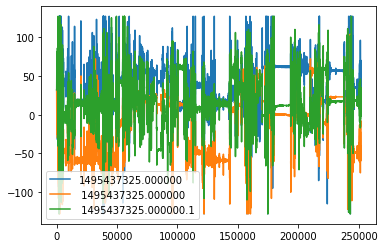

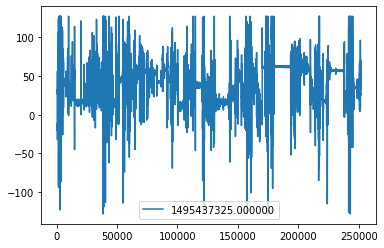

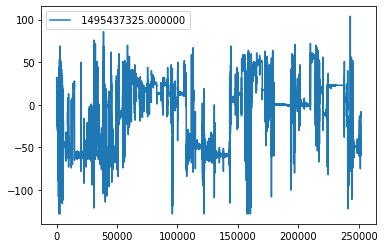

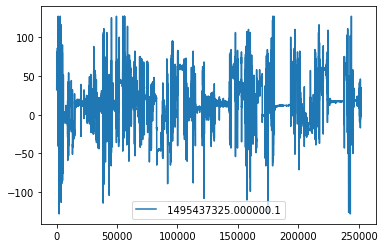

In [ ]:
# Visualizing
ACC_df = getParticipantData(2)['ACC']
ACC_x = getParticipantData(2)['ACC_x']
ACC_y = getParticipantData(2)['ACC_y']
ACC_z = getParticipantData(2)['ACC_z']

ACC_df.plot()
ACC_x.plot()
ACC_y.plot()
ACC_z.plot()

In [ ]:
ACC_df.info()
ACC_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251971 entries, 0 to 251970
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   1495437325.000000     251971 non-null  float64
 1    1495437325.000000    251971 non-null  float64
 2    1495437325.000000.1  251971 non-null  float64
dtypes: float64(3)
memory usage: 5.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251971 entries, 0 to 251970
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   1495437325.000000  251971 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [ ]:
display(ACC_df)
display(ACC_x)
display(ACC_y)
display(ACC_z)

,1495437325.000000,1495437325.000000,1495437325.000000.1
0,32.0,32.0,32.0
1,29.0,-6.0,55.0
2,28.0,-6.0,55.0
3,28.0,-6.0,55.0
4,28.0,-6.0,55.0
...,...,...,...
251966,61.0,-14.0,3.0
251967,61.0,-14.0,3.0
251968,60.0,-14.0,4.0
251969,63.0,-14.0,5.0


,1495437325.000000
0,32.0
1,29.0
2,28.0
3,28.0
4,28.0
...,...
251966,61.0
251967,61.0
251968,60.0
251969,63.0


,1495437325.000000
0,32.0
1,-6.0
2,-6.0
3,-6.0
4,-6.0
...,...
251966,-14.0
251967,-14.0
251968,-14.0
251969,-14.0


,1495437325.000000.1
0,32.0
1,55.0
2,55.0
3,55.0
4,55.0
...,...
251966,3.0
251967,3.0
251968,4.0
251969,5.0


## **Resampling Begins Here**

In [ ]:
from scipy import signal

In [ ]:
# testing 
display(BVP_df)
freq = BVP_df.iloc[0,0]
print(freq)
len(BVP_df)

,1495437325.00
0,64.00
1,-0.00
2,-0.00
3,-0.00
4,-0.00
...,...
503939,96.51
503940,92.92
503941,85.61
503942,75.98


64.0


503944

In [ ]:
# function to calculate the number of samples in the resampled signal
def get_num_signals(new_freq, old_freq, num_rows):

  # assuming that first line is header, and second line that contains freq has already been removed. 
  num_signals = ((num_rows)/old_freq)*new_freq
  return int(num_signals)

In [ ]:
get_num_signals(128, 64, 503943)

1007886

array([[64.  ],
       [-0.  ],
       [-0.  ],
       ...,
       [85.61],
       [75.98],
       [65.86]])

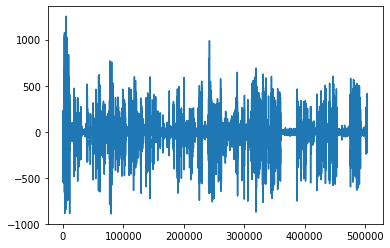

In [ ]:
bvp_new_arr = BVP_df.to_numpy()
display(bvp_new_arr)
plt.plot(bvp_new_arr)

array([[ 6.40000000e+01],
       [ 3.22025773e+01],
       [-4.80506791e-14],
       ...,
       [ 6.54122719e+01],
       [ 6.58600000e+01],
       [ 7.27616572e+01]])

1007888

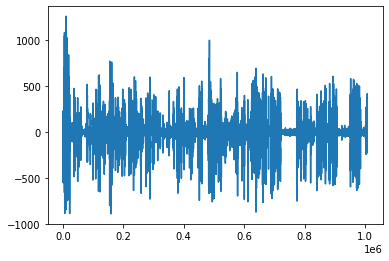

In [ ]:
# testing signal resampling
old_freq = BVP_df.iloc[0,0]
BVP_df_drop = BVP_df.drop(labels=0, axis=0)
num_rows = len(BVP_df)
resampled_BVP = signal.resample(BVP_df, int(get_num_signals(128, old_freq, num_rows)))
plt.plot(resampled_BVP)
display(resampled_BVP)
len(resampled_BVP)

In [ ]:
old_freq = BVP_df.iloc[0,0]
BVP_df_drop = BVP_df.drop(labels=0, axis=0)
#BVP_df_drop = BVP_df_drop.rename(columns=BVP_df_drop.iloc[0]).drop(BVP_df_drop.index[0])
BVP_df_drop_reindex = BVP_df_drop.reset_index(drop = True)
BVP_df_drop_reindex_header = BVP_df_drop_reindex.copy()
BVP_df_drop_reindex_header.columns = ['signal']

In [ ]:
def remove_rows(dataframe):
  dataframe_drop = dataframe.drop(labels = 0, axis = 0)
  dataframe_drop_reindex = dataframe_drop.reset_index(drop=True)
  dataframe_drop_reindex_header = dataframe_drop_reindex.copy()
  dataframe_drop_reindex_header.columns = ['signal']
  
  return dataframe_drop_reindex_header

In [ ]:
print("original df:")
display(BVP_df)
print("resample df:")
display(BVP_df_drop)
print("reindexed df:")
display(BVP_df_drop_reindex)
print("add header to df:")
display(BVP_df_drop_reindex_header)

original df:


,1495437325.00
0,64.00
1,-0.00
2,-0.00
3,-0.00
4,-0.00
...,...
503939,96.51
503940,92.92
503941,85.61
503942,75.98


resample df:


,1495437325.00
1,-0.00
2,-0.00
3,-0.00
4,-0.00
5,-0.00
...,...
503939,96.51
503940,92.92
503941,85.61
503942,75.98


reindexed df:


,1495437325.00
0,-0.00
1,-0.00
2,-0.00
3,-0.00
4,-0.00
...,...
503938,96.51
503939,92.92
503940,85.61
503941,75.98


add header to df:


,signal
0,-0.00
1,-0.00
2,-0.00
3,-0.00
4,-0.00
...,...
503938,96.51
503939,92.92
503940,85.61
503941,75.98


array([[ 4.43537102e-14],
       [-8.53669672e+00],
       [ 1.47852152e-14],
       ...,
       [ 7.89977142e+01],
       [ 6.58600000e+01],
       [ 3.20136894e+01]])

,1495437325.00
0,64.00
1,-0.00
2,-0.00
3,-0.00
4,-0.00
...,...
503939,96.51
503940,92.92
503941,85.61
503942,75.98


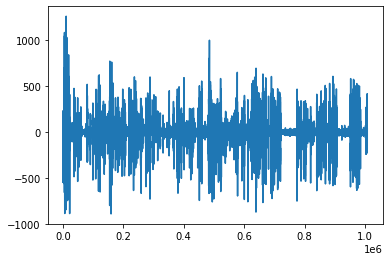

In [ ]:
num_rows = len(BVP_df_drop)
resampled_BVP = signal.resample(BVP_df_drop, int(get_num_signals(128, old_freq, num_rows)))
plt.plot(resampled_BVP)
display(resampled_BVP)
len(resampled_BVP)

display(BVP_df)

,1495437325.00
0,64.00
1,-0.00
2,-0.00
3,-0.00
4,-0.00
...,...
503939,96.51
503940,92.92
503941,85.61
503942,75.98


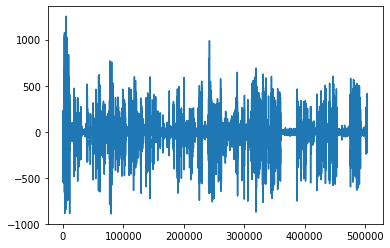

In [ ]:
plt.plot(BVP_df)
display(BVP_df)

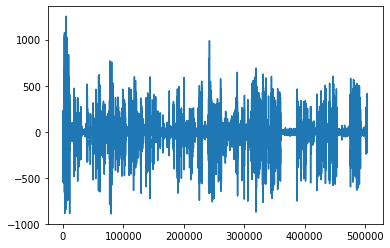

In [ ]:
plt.plot(BVP_df)

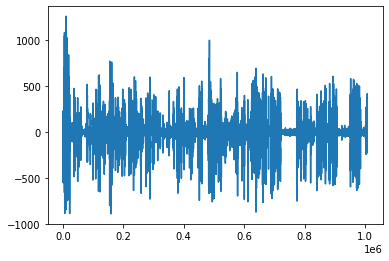

In [ ]:
plt.plot(resampled_BVP)

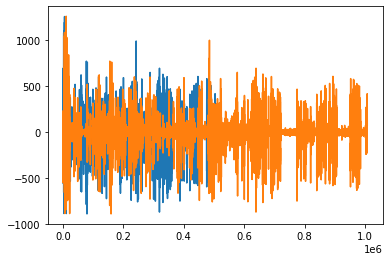

In [ ]:
plt.plot(BVP_df)
plt.plot(resampled_BVP)

In [ ]:
BVP_resampled_df = pd.DataFrame(resampled_BVP)
BVP_resampled_df.info()
display(BVP_resampled_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007888 entries, 0 to 1007887
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1007888 non-null  float64
dtypes: float64(1)
memory usage: 7.7 MB


,0
0,6.400000e+01
1,3.220258e+01
2,-4.805068e-14
3,-8.899012e+00
4,-7.373360e-19
...,...
1007883,8.458927e+01
1007884,7.598000e+01
1007885,6.541227e+01
1007886,6.586000e+01


In [ ]:
def resample(participant, file_name, new_freq):

  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/S{}/'.format(participant, participant)

pl  
  # get the frequency from the first row
  old_freq = data.iloc[0,0]

  # drop first row which is not a signal and the header
  data = remove_rows(data)

  num_rows = len(data)
  num_signals = get_num_signals(new_freq, old_freq, num_rows)

  resampled_df = pd.DataFrame(signal.resample(data, num_signals))
  # save file
  resampled_df.to_csv(os.path.join(path, 'resampled_{}'.format(file_name)), index=False)  

  return resampled_df

In [ ]:
# trial 
test_df = resample(2,"BVP.csv", 128)

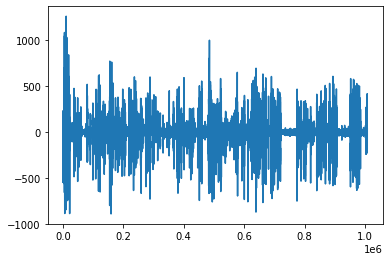

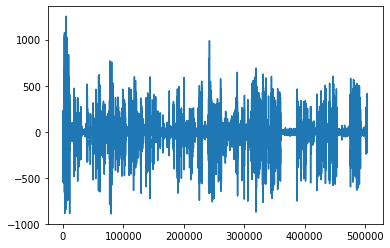

,0
0,4.435371e-14
1,-8.536697e+00
2,1.478522e-14
3,4.677721e+00
4,1.108843e-14
...,...
1007881,7.643640e+01
1007882,7.598000e+01
1007883,7.899771e+01
1007884,6.586000e+01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007886 entries, 0 to 1007885
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1007886 non-null  float64
dtypes: float64(1)
memory usage: 7.7 MB


,1495437325.00
0,64.00
1,-0.00
2,-0.00
3,-0.00
4,-0.00
...,...
503939,96.51
503940,92.92
503941,85.61
503942,75.98


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503944 entries, 0 to 503943
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   1495437325.00  503944 non-null  float64
dtypes: float64(1)
memory usage: 3.8 MB


In [ ]:
plt.plot(test_df)
plt.show()
plt.plot(BVP_df)
plt.show()
display(test_df)
test_df.info()
display(BVP_df)
BVP_df.info()

In [ ]:
# resample all Empatica files for all patients
file_names = ['ACC_x.csv', 'ACC_y.csv', 'ACC_z.csv', 'BVP.csv', 'EDA.csv','TEMP.csv']

In [ ]:
for participant in participants_id:
  for file in file_names:
    resample(participant, file,128)